# Mapping Net Visa Changes Across Australia: A Regional Analysis

This study maps visa trends from 2004 to 2024 across different regions in Australia. It examines how visa arrivals and departures have varied over time to reveal regional patterns and trends. 

More info at [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/industry/tourism-and-transport/overseas-arrivals-and-departures-australia/latest-release#key-statistics)

In [124]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd


In [125]:
import shapely
import fiona
import geopy.distance
from shapely.geometry import Point, Polygon, MultiPolygon

# Arrivals Data 

ARRIVALS DATA: "excel_file_path_ARR" and File - 3401016 Visas ARR

In [126]:
excel_file_path_ARR = "3401016 Visas ARR.xlsx"

travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_ARR.head()

C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\2551079299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)


,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,37390.0,5170.0,8550.0,9060.0,22790.0,6850.0,1860.0,2550.0,880.0,4370.0,2910.0,19410.0,6020.0,114880.0,3280.0,2750.0,146340.0,1200.0,359890.0
1,2004-08-01,37500.0,5130.0,6710.0,7580.0,19430.0,2110.0,870.0,450.0,460.0,1080.0,250.0,5220.0,5180.0,105300.0,4340.0,2750.0,122780.0,980.0,304160.0
2,2004-09-01,36180.0,4490.0,6710.0,7860.0,19060.0,1000.0,800.0,190.0,790.0,580.0,270.0,3640.0,4400.0,97500.0,7390.0,2710.0,115640.0,960.0,299870.0
3,2004-10-01,39900.0,5170.0,7140.0,9010.0,21320.0,2040.0,1210.0,830.0,890.0,480.0,440.0,5900.0,5600.0,119060.0,7440.0,2380.0,140380.0,1360.0,373070.0
4,2004-11-01,33620.0,4470.0,6190.0,7370.0,18030.0,1520.0,670.0,140.0,470.0,440.0,370.0,3600.0,4140.0,138590.0,7420.0,2510.0,156270.0,1810.0,326660.0


In [219]:
excel_file_path_DEP = "3401017 Visas DEP.xlsx"
travel_data_DEP = pd.read_excel(excel_file_path_DEP, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_DEP.head()

,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,38770.0,4500.0,5860.0,7180.0,17540.0,3360.0,1110.0,870.0,440.0,1800.0,1420.0,9010.0,5190.0,101150.0,4240.0,3600.0,123190.0,1130.0,318740.0
1,2004-08-01,37630.0,3420.0,5480.0,7440.0,16340.0,830.0,620.0,100.0,290.0,990.0,470.0,3310.0,4050.0,123840.0,4050.0,2980.0,138230.0,950.0,313760.0
2,2004-09-01,33670.0,3640.0,5560.0,8540.0,17740.0,1290.0,900.0,670.0,380.0,440.0,410.0,4090.0,4110.0,92980.0,3700.0,2970.0,107860.0,910.0,313000.0
3,2004-10-01,39950.0,3520.0,5820.0,6340.0,15690.0,1050.0,780.0,240.0,180.0,440.0,210.0,2900.0,3910.0,116660.0,3010.0,2930.0,129410.0,890.0,305870.0
4,2004-11-01,32770.0,4080.0,6390.0,6600.0,17060.0,6440.0,760.0,1500.0,160.0,1800.0,1280.0,11940.0,3910.0,139990.0,3580.0,3250.0,162680.0,1630.0,333640.0


# Histograms for the Distributions of Visas. (ALl Categories)

These histograms help to show how often different types of visas are used in arrivals and departures. By displaying the number of times each visa type occurs, they make it easy to see which visas are most and least common. This visual tool provides a quick overview of the data, offering a brief understanding of the trends and distributions before diving into more detailed analysis. Additionally, with separate histograms for permanent visas, temporary student visas, and temporary skilled visas, they allow for a clear comparison of usage patterns across these different visa categories.

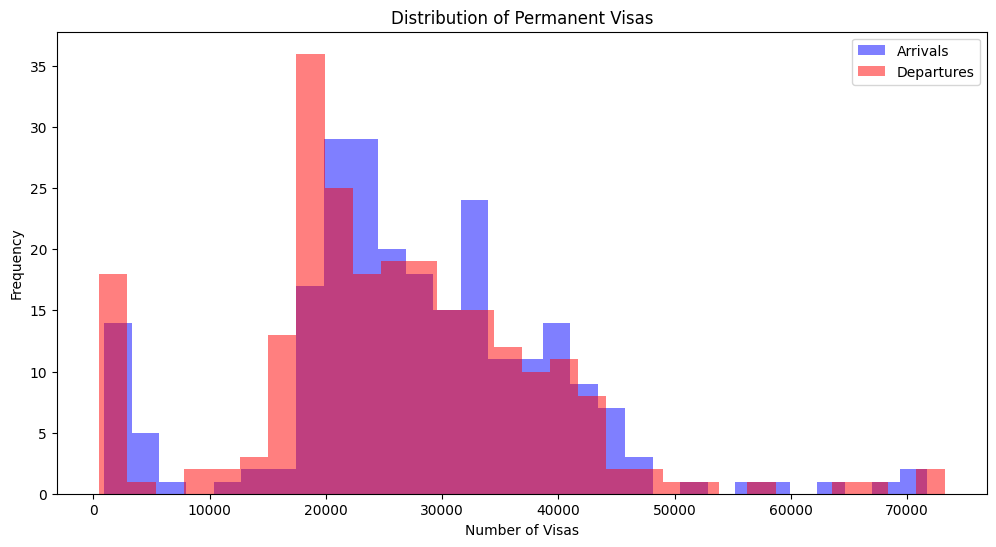

In [220]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Permanent Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Permanent Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Permanent Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

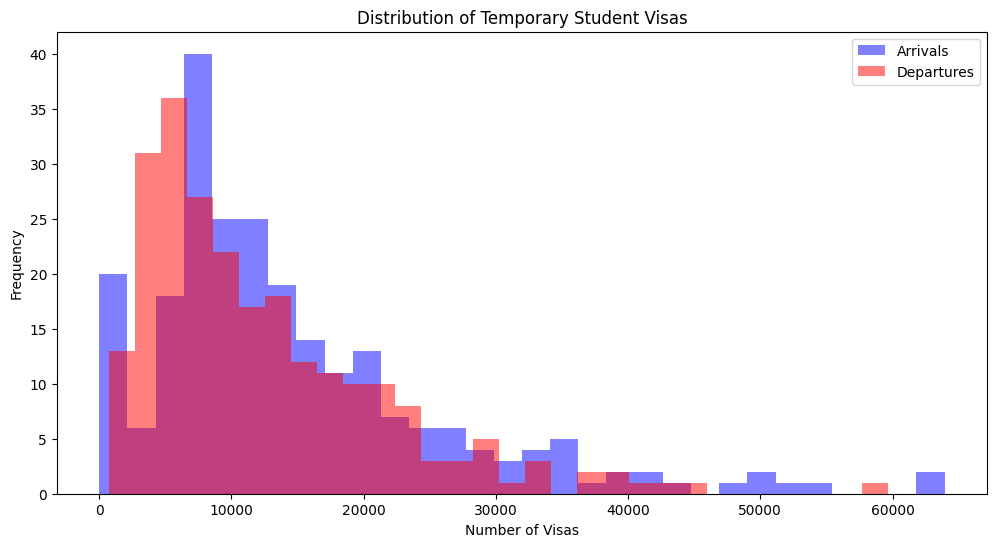

In [222]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Temporary Student Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Student Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Student Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

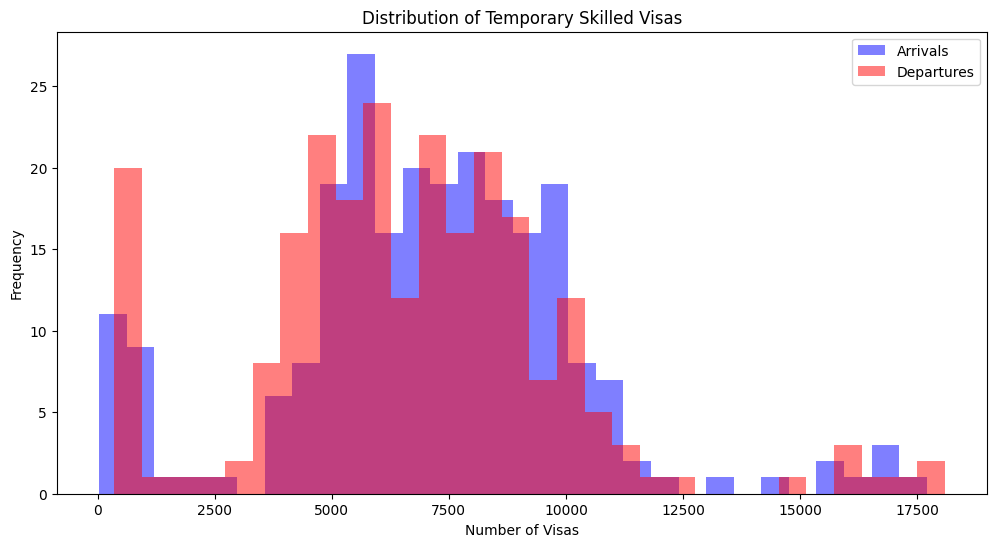

In [221]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Temporary Skilled Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Skilled Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Skilled Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

In [127]:
excel_file = pd.ExcelFile(excel_file_path_ARR) 
print("Sheet names:", excel_file.sheet_names)

date_format = "%m-%Y"

date_parser = lambda x: pd.to_datetime(x, format=date_format)

excel_file = pd.ExcelFile(excel_file_path_ARR)

print("Sheet names:", excel_file.sheet_names)

sheets = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']
dataframes = {}

for sheet in sheets:
    ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
    ARR_DF.columns = ['Month', 'Special_Category_Visa', 'P_Fam_Visas', 'P_Skilled_Visas', 'P_Other_Visas', 'P_Visas_TOTAL', 'T_Student_Visas_HiEd', 'T_Student_Visas_VET', 'T_Student_Visas_Schools', 'T_Student_Visas_INDP_ELICOS(f)', 'T_Student_Visas_PGrad_Research', 'T_Student_Visas_Other_Students', 'T_Student_Visas_TOTAL', 'T_Skilled_Visas', 'T_Visitor_Visas', 'T_Work_Visas', 'T_Other_Visas', 'T_Visas_TOTAL', 'Other_Visas(g)', 'TOTAL(h)']
    dataframes[sheet] = ARR_DF

for sheet, ARR_DF in dataframes.items():
    print(f"{sheet} data:")
    print(ARR_DF.head(10))

Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']


C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_22748\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, 

NSW data:
       Month  Special_Category_Visa  P_Fam_Visas  P_Skilled_Visas  \
0 2004-07-01                37390.0       5170.0           8550.0   
1 2004-08-01                37500.0       5130.0           6710.0   
2 2004-09-01                36180.0       4490.0           6710.0   
3 2004-10-01                39900.0       5170.0           7140.0   
4 2004-11-01                33620.0       4470.0           6190.0   
5 2004-12-01                40660.0       4330.0           5990.0   
6 2005-01-01                41720.0       7430.0          11580.0   
7 2005-02-01                32290.0       5020.0           7630.0   
8 2005-03-01                37620.0       5500.0           7250.0   
9 2005-04-01                36690.0       4990.0           8000.0   

   P_Other_Visas  P_Visas_TOTAL  T_Student_Visas_HiEd  T_Student_Visas_VET  \
0         9060.0        22790.0                6850.0               1860.0   
1         7580.0        19430.0                2110.0                870.0

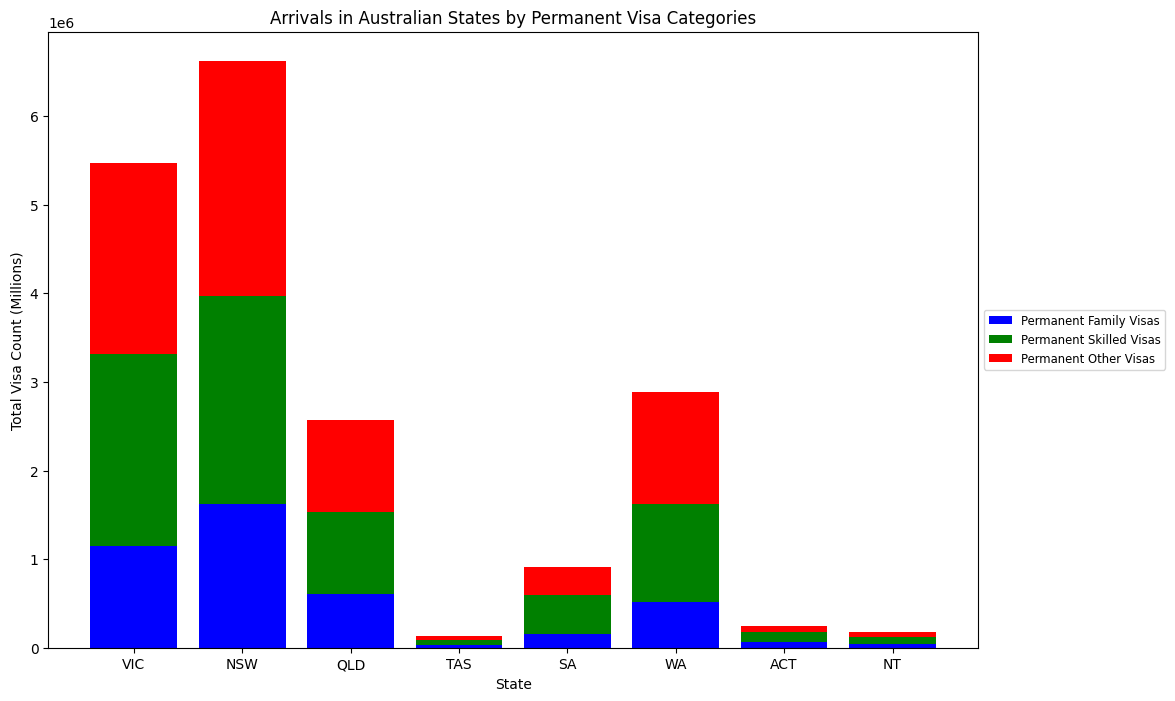

In [207]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']

# Read data from Excel into a dictionary of DataFrames
data = {}
for state in states:
    data[state] = pd.read_excel(excel_file_path_ARR, sheet_name=state, skiprows=15)

# Example categories, make sure these match the column names in your Excel file
categories = ['Permanent Family Visas', 'Permanent Skilled Visas', 'Permanent Other Visas']
colors = ['blue', 'green', 'red']

# Prepare the data for the stacked bar chart
values = {}
for category in categories:
    values[category] = [data[state][category].sum() for state in states]  # Sum the values for each state

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bottom_values = np.zeros(len(states))
for idx, category in enumerate(categories):
    ax.bar(states, values[category], bottom=bottom_values, color=colors[idx], label=category)
    bottom_values += values[category]

# Add titles and labels
plt.title('Arrivals in Australian States by Permanent Visa Categories')
plt.xlabel('State')
plt.ylabel('Total Visa Count (Millions)')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Display the plot
plt.show()

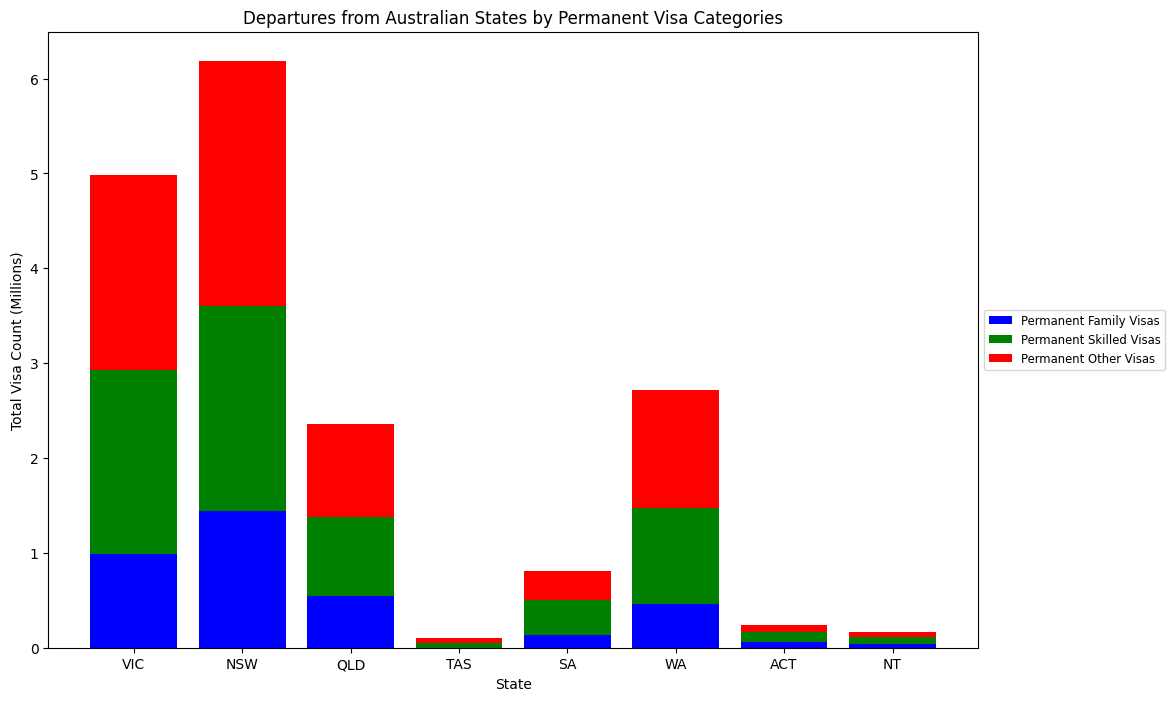

In [218]:
excel_file_path_DEP = r"C:\Users\ameli\1161\travel_dataproject\data_introduction\3401017 Visas DEP.xlsx"
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']

# Read data from Excel into a dictionary of DataFrames
data = {}
for state in states:
    df = pd.read_excel(excel_file_path_DEP, sheet_name=state, skiprows=15)
    df.columns = df.columns.str.strip()  # Strip extra spaces from column names
    data[state] = df

# Example categories, ensure these match the column names in your Excel file
categories = ['Permanent Family Visas', 'Permanent Skilled Visas', 'Permanent Other Visas']
colors = ['blue', 'green', 'red']

# Prepare the data for the stacked bar chart
values = {}
for category in categories:
    values[category] = []
    for state in states:
        if category in data[state].columns:
            values[category].append(data[state][category].sum() / 1_000_000)
        else:
            values[category].append(0)  # Handle missing columns

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bottom_values = np.zeros(len(states))
for idx, category in enumerate(categories):
    ax.bar(states, values[category], bottom=bottom_values, color=colors[idx], label=category)
    bottom_values += values[category]

# Add titles and labels
plt.title('Departures from Australian States by Permanent Visa Categories')
plt.xlabel('State')
plt.ylabel('Total Visa Count (Millions)')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Display the plot
plt.show()

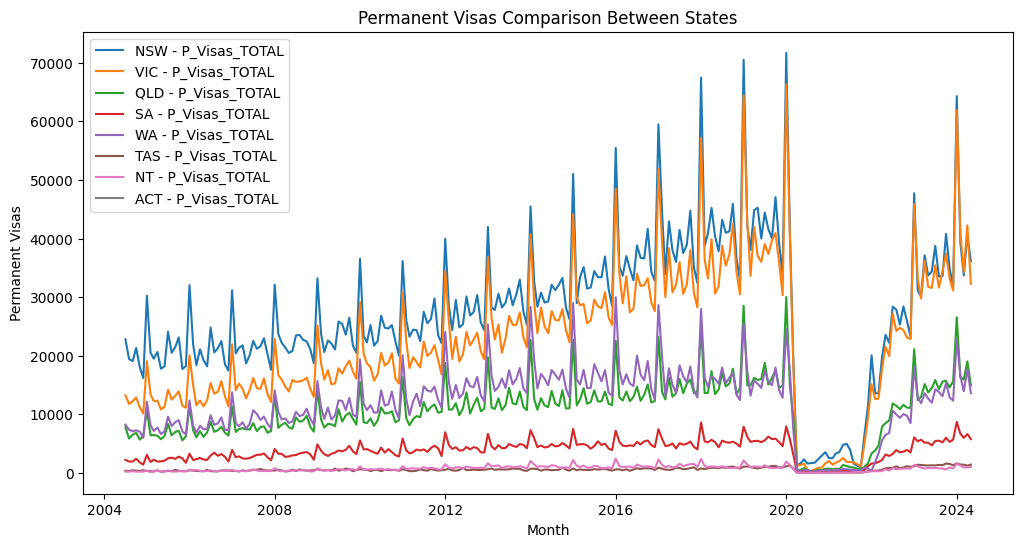

In [228]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'P_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['P_Visas_TOTAL'] = pd.to_numeric(ARR_DF['P_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['P_Visas_TOTAL'], label=f'{sheet} - P_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'P_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('Permanent Visas')
plt.title('Permanent Visas Comparison Between States')
plt.legend()
plt.show()

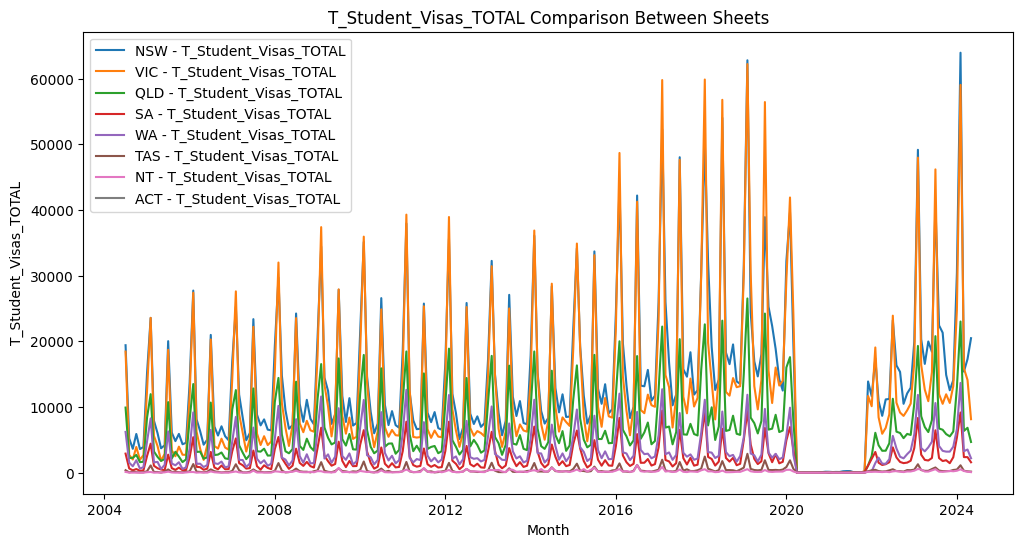

In [129]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Student_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Student_Visas_TOTAL'] = pd.to_numeric(ARR_DF['T_Student_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Student_Visas_TOTAL'], label=f'{sheet} - T_Student_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Student_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('T_Student_Visas_TOTAL')
plt.title('T_Student_Visas_TOTAL Comparison Between Sheets')
plt.legend()
plt.show()

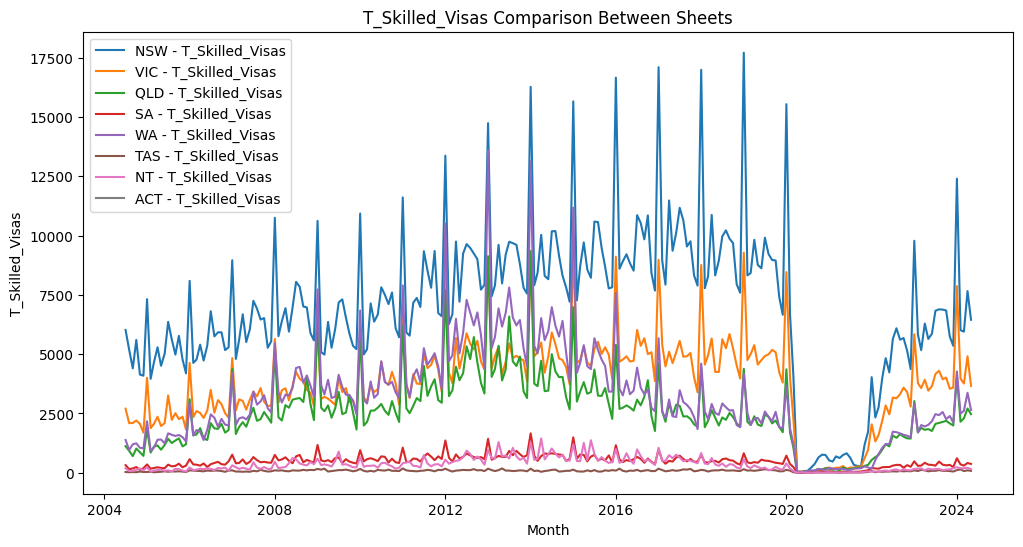

In [130]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Skilled_Visas' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Skilled_Visas'] = pd.to_numeric(ARR_DF['T_Skilled_Visas'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Skilled_Visas'], label=f'{sheet} - T_Skilled_Visas')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Skilled_Visas'")

plt.xlabel('Month')
plt.ylabel('T_Skilled_Visas')
plt.title('T_Skilled_Visas Comparison Between Sheets')
plt.legend()
plt.show()

This graph shows the distribution of Family Visas within both the Departures and Arrivals categories. 

In [132]:
if 'P_Fam_Visas' in travel_data_ARR.columns and 'Permanent Family Visas' in travel_data_DEP.columns:
    # Optional: Convert columns to numeric if needed
    travel_data_ARR['P_Fam_Visas'] = pd.to_numeric(travel_data_ARR['P_Fam_Visas'], errors='coerce')
    travel_data_DEP['Permanent Family Visas'] = pd.to_numeric(travel_data_DEP['Permanent Family Visas'], errors='coerce')

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Plot histograms for arrivals and departures
    travel_data_ARR['P_Fam_Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Departures', color='red')
    travel_data_DEP['Permanent Family Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Arrivals', color='blue')

    # Adding labels, title, and legend
    plt.legend()
    plt.title('Distribution of Family Visas')
    plt.xlabel('Number of Visas')
    plt.ylabel('Frequency')  # Added y-axis label for clarity

    # Show the plot
    plt.show()
else:
    print("One or both columns are missing or misnamed in the DataFrames.")

One or both columns are missing or misnamed in the DataFrames.


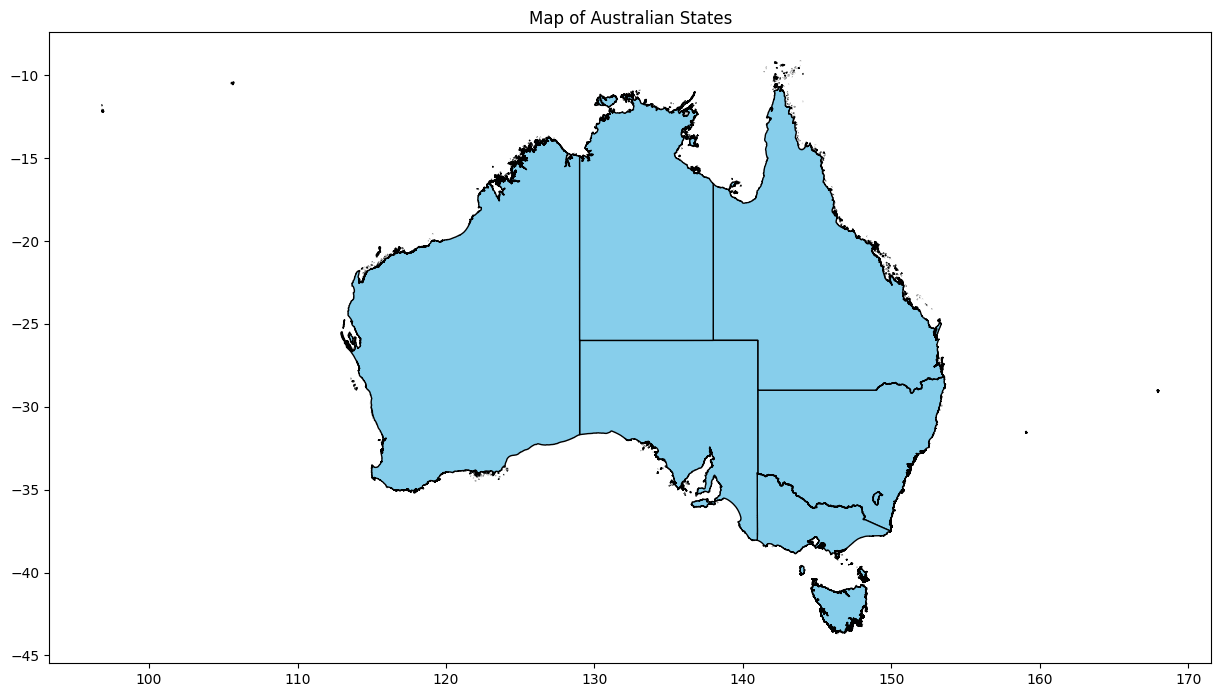

In [133]:
shapefile_path = r"C:\Users\ameli\1161\travel_dataproject\Aus Map Shape.zip"

try:
    gdf = gpd.read_file(shapefile_path)

    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, color='skyblue', edgecolor='black')

    ax.set_title('Map of Australian States')
    plt.show()

except Exception as e:
    print(f"An error occurred while reading the shapefile: {e}")



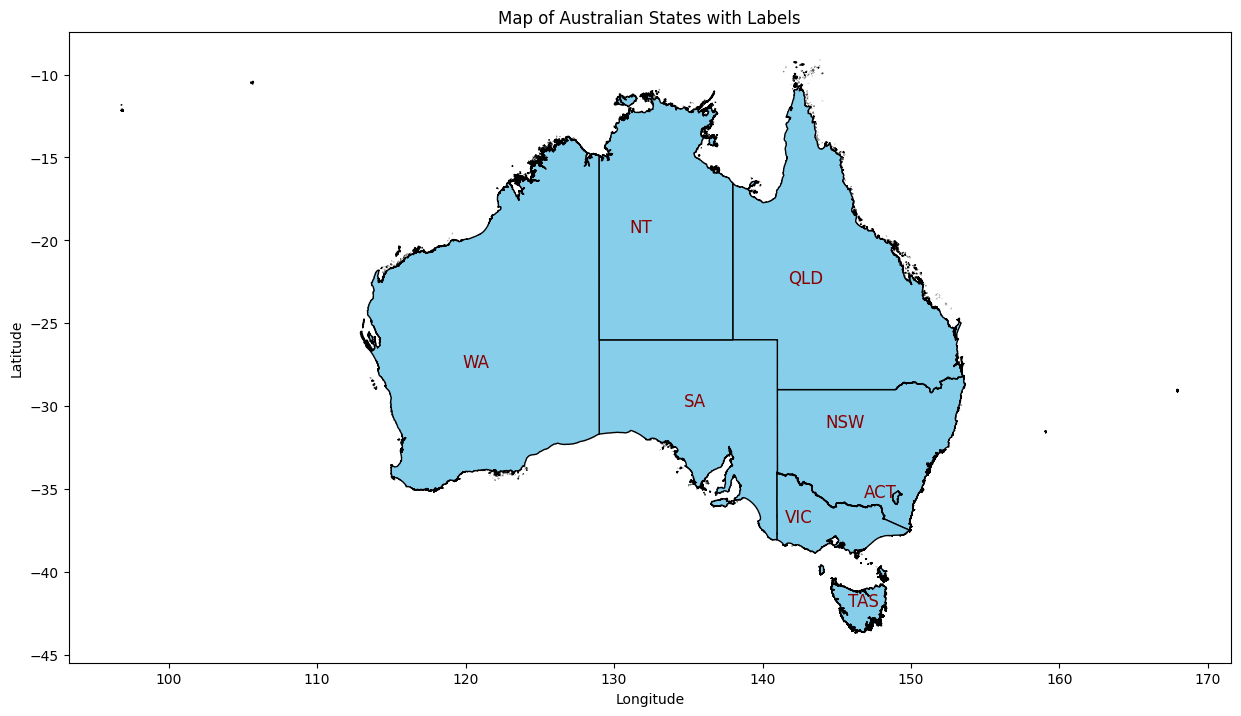

In [134]:
shapefile_path = r"C:\Users\ameli\1161\travel_dataproject\Aus Map Shape.zip"

# Sample data for labels
labels_data = {
    'Location': ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'NT', 'ACT', 'TAS'],
    'Latitude': [-31.2532, -36.9848, -22.5752, -27.6728, -30.0002, -19.4914, -35.4735, -42.0409],
    'Longitude': [146.9211, 143.3906, 144.0848, 121.6283, 136.2092, 132.5510, 149.0124, 147.8087]
}
labels_df = pd.DataFrame(labels_data)

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Ensure data types are correct
    labels_df['Latitude'] = pd.to_numeric(labels_df['Latitude'], errors='coerce')
    labels_df['Longitude'] = pd.to_numeric(labels_df['Longitude'], errors='coerce')

    # Plot the map
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, color='skyblue', edgecolor='black')

    # Add labels
    for idx, row in labels_df.iterrows():
        ax.text(
            row['Longitude'],   # Longitude value from labels_df
            row['Latitude'],    # Latitude value from labels_df
            row['Location'],    # Location name from labels_df
            fontsize=12,
            ha='right',
            color='darkred'
        )

    # Set plot title and labels
    ax.set_title('Map of Australian States with Labels')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()

except Exception as e:
    print(f"An error occurred while reading the shapefile: {e}")

# This next section just shows the sum of the category "Permanent Visas - Total", "Temporary Student Visas - Total" and "Temporary Skilled Visas".  

In [135]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Permanent Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Permanent Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Permanent Visas
0             VIC              5271090.0
1             NSW              6289560.0
2             QLD              2455640.0
3              WA              2759120.0
4              SA               880620.0
5             TAS               130910.0
6             ACT               238230.0
7              NT               169200.0


<Figure size 640x480 with 0 Axes>

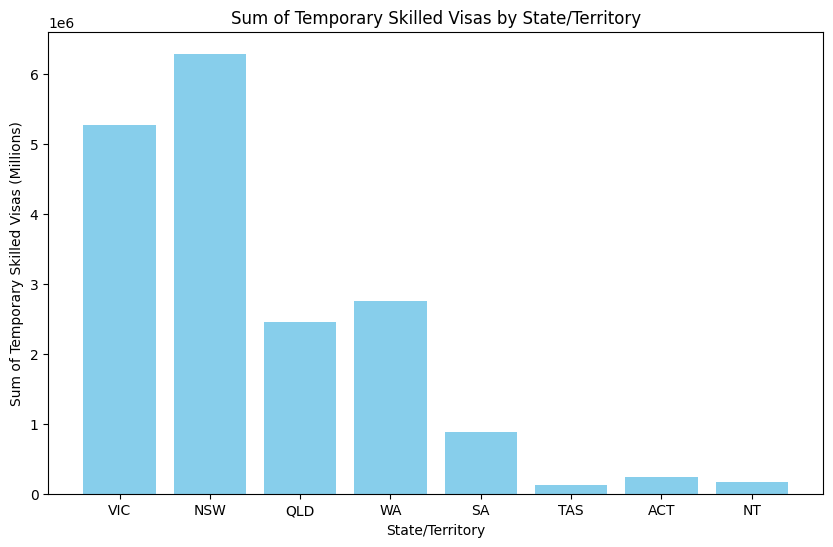

In [136]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [5271090.0, 6289560.0, 2455640.0, 2759120.0, 880620.0, 130910.0, 238230.0, 169200.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

In [137]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Student Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Permanent Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Permanent Visas
0             VIC              2957140.0
1             NSW              3354840.0
2             QLD              1523570.0
3              WA               766570.0
4              SA               495310.0
5             TAS                84800.0
6             ACT               239360.0
7              NT                42080.0


<Figure size 640x480 with 0 Axes>

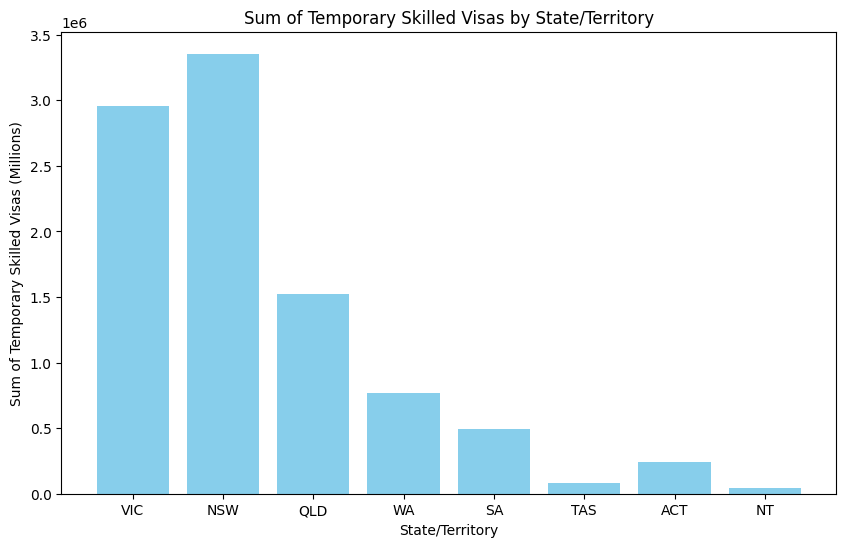

In [138]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [2957140.0, 3354840.0, 1523570.0, 766570.0, 495310.0, 84800.0, 239360.0, 42080.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

In [139]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Skilled Visas'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Temporary Skilled Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Temporary Skilled Visas
0             VIC                       881970.0
1             NSW                      1607420.0
2             QLD                       596310.0
3              WA                       751880.0
4              SA                       111250.0
5             TAS                        18270.0
6             ACT                        46600.0
7              NT                        82390.0


<Figure size 640x480 with 0 Axes>

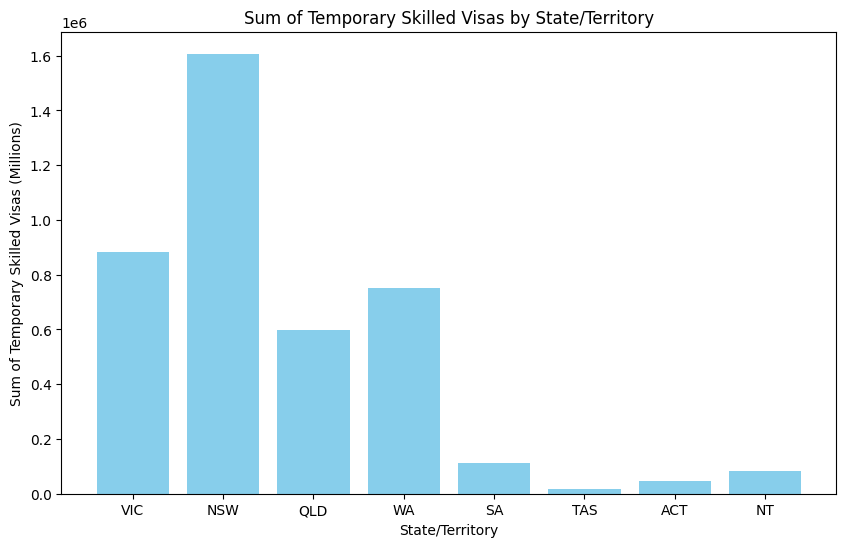

In [140]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [881970.0, 1607420.0, 596310.0, 751880.0, 111250.0, 18270.0, 46600.0, 82390.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

# PIECHARTS
This section is data to make a piechart.
Permanent Visas - Underlying Categories

In [141]:
sheet_name = 'Overall'  # Specify the sheet name
df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=16)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Specify the correct column names
column_names = [
    'Permanent Family Visas', 
    'Permanent Skilled Visas',
    'Permanent Other Visas'
]  # Ensure these match exactly

# Initialize a dictionary to store the sums for each column
column_sums = {}

# Iterate through each column and calculate the sum separately
for col in column_names:
    try:
        col_sum = df.loc[16:254, col].sum()
        column_sums[col] = col_sum
        print(f"Sum of values in column '{col}' from row 17 to 255: {col_sum}")
    except KeyError as e:
        print(f"Error: The column '{col}' was not found in the DataFrame.")
        print(e)

# Optionally, you can print the final dictionary with all sums
print("\nFinal sums for each column:")
for col, sum_value in column_sums.items():
    print(f"{col}: {sum_value}")

Sum of values in column 'Permanent Family Visas' from row 17 to 255: 4005390.0
Sum of values in column 'Permanent Skilled Visas' from row 17 to 255: 6930410.0
Sum of values in column 'Permanent Other Visas' from row 17 to 255: 7260460.0

Final sums for each column:
Permanent Family Visas: 4005390.0
Permanent Skilled Visas: 6930410.0
Permanent Other Visas: 7260460.0


Piecharts for the underlying categories of Temporary Student Visas

In [142]:
sheet_name = 'Overall'  # Specify the sheet name
df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=16)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Specify the correct column names
column_names = [
    'Temporary Student Visas - Higher Educ.',
    'Temporary Student Visas - Vocational Educ. & Training',
    'Temporary Student Visas - Schools',
    'Temporary Student Visas - Independent ELICOS(g)',
    'Temporary Student Visas - Postgraduate Research',
    'Temporary Student Visas - Other Students'
]  # Ensure these match exactly

# Initialize a dictionary to store the sums for each column
column_sums = {}

# Iterate through each column and calculate the sum separately
for col in column_names:
    try:
        col_sum = df.loc[16:254, col].sum()
        column_sums[col] = col_sum
        print(f"Sum of values in column '{col}' from row 17 to 255: {col_sum}")
    except KeyError as e:
        print(f"Error: The column '{col}' was not found in the DataFrame.")
        print(e)

# Optionally, you can print the final dictionary with all sums
print("\nFinal sums for each column:")
for col, sum_value in column_sums.items():
    print(f"{col}: {sum_value}")

Sum of values in column 'Temporary Student Visas - Higher Educ.' from row 17 to 255: 5793070.0
Sum of values in column 'Temporary Student Visas - Vocational Educ. & Training' from row 17 to 255: 1441010.0
Sum of values in column 'Temporary Student Visas - Schools' from row 17 to 255: 594780.0
Sum of values in column 'Temporary Student Visas - Independent ELICOS(g)' from row 17 to 255: 600040.0
Sum of values in column 'Temporary Student Visas - Postgraduate Research' from row 17 to 255: 422420.0
Sum of values in column 'Temporary Student Visas - Other Students' from row 17 to 255: 612600.0

Final sums for each column:
Temporary Student Visas - Higher Educ.: 5793070.0
Temporary Student Visas - Vocational Educ. & Training: 1441010.0
Temporary Student Visas - Schools: 594780.0
Temporary Student Visas - Independent ELICOS(g): 600040.0
Temporary Student Visas - Postgraduate Research: 422420.0
Temporary Student Visas - Other Students: 612600.0


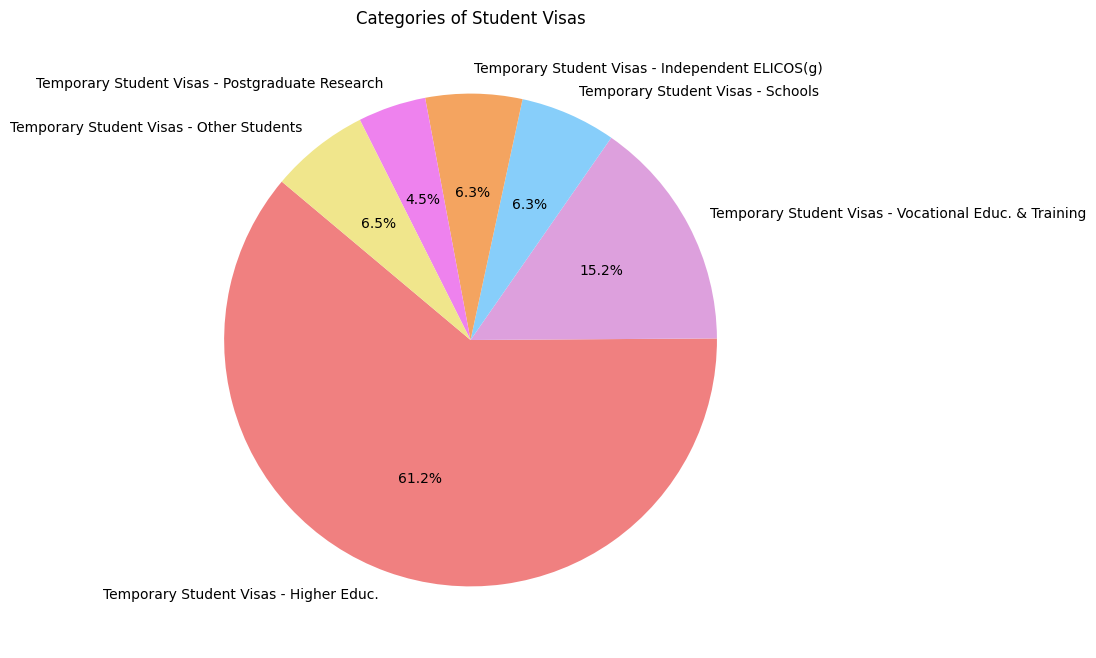

In [143]:
categories = ['Temporary Student Visas - Higher Educ.',
'Temporary Student Visas - Vocational Educ. & Training',
'Temporary Student Visas - Schools',
'Temporary Student Visas - Independent ELICOS(g)',
'Temporary Student Visas - Postgraduate Research',
'Temporary Student Visas - Other Students']
values = [5793070.0, 1441010.0, 594780.0, 600040.0, 422420.0, 612600.0 ]
colors = ['lightcoral','plum','lightskyblue', 'sandybrown', 'violet','khaki']

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
# Add a title
plt.title('Categories of Student Visas')

# Show the plot
plt.show()

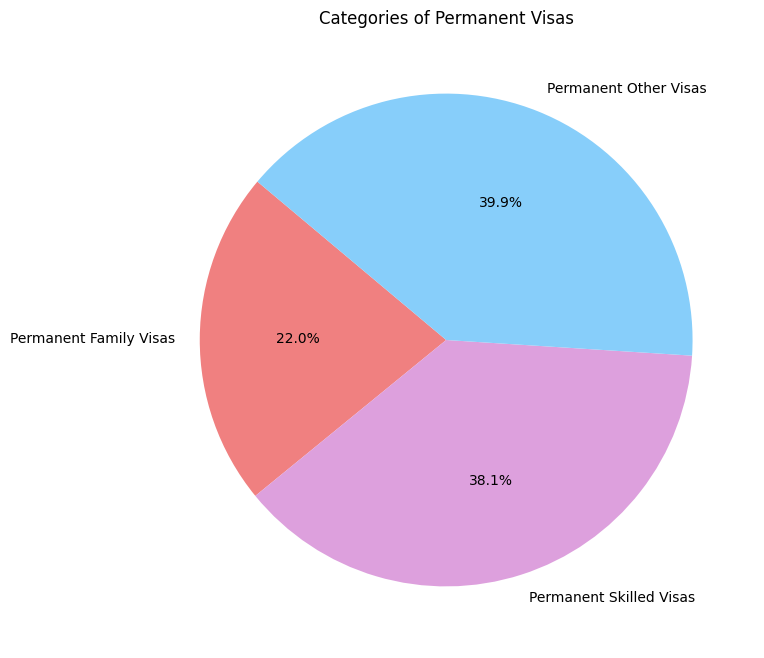

In [144]:
categories = ['Permanent Family Visas', 'Permanent Skilled Visas','Permanent Other Visas']
values = [4005390.0, 6930410.0, 7260460.0]
colors = ['lightcoral','plum','lightskyblue']

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
# Add a title
plt.title('Categories of Permanent Visas')

# Show the plot
plt.show()

In [148]:
# if os.path.isfile("penalty_data_set_0.csv"):
#     filepath = "penalty_data_set_0.csv"
#     print("loading from file")
# else:
#     filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
#     print("loading from the internet")

# penalty_data = pd.read_csv(filepath)
# print("done")


In [149]:
travel_data_ARR.head()

,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,37390.0,5170.0,8550.0,9060.0,22790.0,6850.0,1860.0,2550.0,880.0,4370.0,2910.0,19410.0,6020.0,114880.0,3280.0,2750.0,146340.0,1200.0,359890.0
1,2004-08-01,37500.0,5130.0,6710.0,7580.0,19430.0,2110.0,870.0,450.0,460.0,1080.0,250.0,5220.0,5180.0,105300.0,4340.0,2750.0,122780.0,980.0,304160.0
2,2004-09-01,36180.0,4490.0,6710.0,7860.0,19060.0,1000.0,800.0,190.0,790.0,580.0,270.0,3640.0,4400.0,97500.0,7390.0,2710.0,115640.0,960.0,299870.0
3,2004-10-01,39900.0,5170.0,7140.0,9010.0,21320.0,2040.0,1210.0,830.0,890.0,480.0,440.0,5900.0,5600.0,119060.0,7440.0,2380.0,140380.0,1360.0,373070.0
4,2004-11-01,33620.0,4470.0,6190.0,7370.0,18030.0,1520.0,670.0,140.0,470.0,440.0,370.0,3600.0,4140.0,138590.0,7420.0,2510.0,156270.0,1810.0,326660.0


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [150]:
travel_data_ARR.sample(5)


,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
230,2023-09-01,46550.0,7910.0,9420.0,16230.0,33570.0,13360.0,4300.0,130.0,2170.0,730.0,630.0,21320.0,6880.0,143410.0,11990.0,13140.0,196740.0,340.0,546280.0
181,2019-08-01,41180.0,8690.0,14920.0,17980.0,41580.0,17870.0,4050.0,150.0,1470.0,900.0,840.0,25270.0,9220.0,207460.0,7470.0,9430.0,258850.0,470.0,618430.0
72,2010-07-01,41520.0,6990.0,9170.0,10660.0,26820.0,16330.0,3600.0,2270.0,880.0,640.0,2850.0,26580.0,7820.0,112840.0,4740.0,3840.0,155820.0,1510.0,460500.0
174,2019-01-01,50090.0,12250.0,28740.0,29540.0,70530.0,15400.0,8570.0,3140.0,1490.0,1560.0,1380.0,31530.0,17710.0,200500.0,9640.0,15270.0,274660.0,460.0,813630.0
23,2006-06-01,32830.0,4700.0,6470.0,6990.0,18160.0,2010.0,920.0,330.0,900.0,230.0,640.0,5030.0,5360.0,93900.0,4650.0,2370.0,111310.0,1410.0,283630.0


We can also get the list of columns out of the data frame

In [151]:
travel_data_ARR.columns
#colomuns and rows are all indexes. 
# series is the rows 
# NaN = not a number
# 

Index(['Month', 'Special Category Visa (subclass 444)(e)',
       'Permanent Family Visas', 'Permanent Skilled Visas',
       'Permanent Other Visas', 'Permanent Visas - Total',
       'Temporary Student Visas - Higher Educ.',
       'Temporary Student Visas - Vocational Educ. & Training',
       'Temporary Student Visas - Schools',
       'Temporary Student Visas - Independent ELICOS(f)',
       'Temporary Student Visas - Postgraduate Research',
       'Temporary Student Visas - Other Students',
       'Temporary Student Visas - Total', 'Temporary Skilled Visas',
       'Temporary Visitor Visas', 'Temporary Work Visas',
       'Temporary Other Visas', 'Temporary visas - Total', 'Other Visas(g)',
       'Total(h)'],
      dtype='object')

In [152]:
travel_data_DEP.columns

Index(['Month', 'Special Category Visa (subclass 444)(e)',
       'Permanent Family Visas', 'Permanent Skilled Visas',
       'Permanent Other Visas', 'Permanent Visas - Total',
       'Temporary Student Visas - Higher Educ.',
       'Temporary Student Visas - Vocational Educ. & Training',
       'Temporary Student Visas - Schools',
       'Temporary Student Visas - Independent ELICOS(f)',
       'Temporary Student Visas - Postgraduate Research',
       'Temporary Student Visas - Other Students',
       'Temporary Student Visas - Total', 'Temporary Skilled Visas',
       'Temporary Visitor Visas', 'Temporary Work Visas',
       'Temporary Other Visas', 'Temporary visas - Total', 'Other Visas(g)',
       'Total(h)'],
      dtype='object')

In [153]:
travel_data_ARR.columns = ['Month', 'Special Category Visa (subclass 444)(e)',
       'Permanent Family Visas', 'Permanent Skilled Visas',
       'Permanent Other Visas', 'Permanent Visas - Total',
       'Temporary Student Visas - Higher Educ.',
       'Temporary Student Visas - Vocational Educ. & Training',
       'Temporary Student Visas - Schools',
       'Temporary Student Visas - Independent ELICOS(f)',
       'Temporary Student Visas - Postgraduate Research',
       'Temporary Student Visas - Other Students',
       'Temporary Student Visas - Total', 'Temporary Skilled Visas',
       'Temporary Visitor Visas', 'Temporary Work Visas',
       'Temporary Other Visas', 'Temporary visas - Total', 'Other Visas(g)',
       'Total(h)'],


ValueError: Length mismatch: Expected axis has 20 elements, new values have 1 elements

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `travel_data.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [154]:
row_one = travel_data_ARR.iloc[0]
row_one

Month                                                    2004-07-01 00:00:00
Special Category Visa (subclass 444)(e)                              37390.0
Permanent Family Visas                                                5170.0
Permanent Skilled Visas                                               8550.0
Permanent Other Visas                                                 9060.0
Permanent Visas - Total                                              22790.0
Temporary Student Visas - Higher Educ.                                6850.0
Temporary Student Visas - Vocational Educ. & Training                 1860.0
Temporary Student Visas - Schools                                     2550.0
Temporary Student Visas - Independent ELICOS(f)                        880.0
Temporary Student Visas - Postgraduate Research                       4370.0
Temporary Student Visas - Other Students                              2910.0
Temporary Student Visas - Total                                      19410.0

In [155]:
row_one_DEP = travel_data_DEP.iloc[0]
row_one_DEP

Month                                                    2004-07-01 00:00:00
Special Category Visa (subclass 444)(e)                              38770.0
Permanent Family Visas                                                4500.0
Permanent Skilled Visas                                               5860.0
Permanent Other Visas                                                 7180.0
Permanent Visas - Total                                              17540.0
Temporary Student Visas - Higher Educ.                                3360.0
Temporary Student Visas - Vocational Educ. & Training                 1110.0
Temporary Student Visas - Schools                                      870.0
Temporary Student Visas - Independent ELICOS(f)                        440.0
Temporary Student Visas - Postgraduate Research                       1800.0
Temporary Student Visas - Other Students                              1420.0
Temporary Student Visas - Total                                       9010.0

Series objects are _very_ similar to dictionaries. They have more properties though.

In [156]:
row_one["Month"]

Timestamp('2004-07-01 00:00:00')

In [157]:
row_one_DEP["Month"]

Timestamp('2004-07-01 00:00:00')

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [158]:
row_one.Month


Timestamp('2004-07-01 00:00:00')

In [159]:
row_one_DEP.Month

Timestamp('2004-07-01 00:00:00')

Doing the same thing on a dataframe gives us the whole column

In [160]:
row_one

Month                                                    2004-07-01 00:00:00
Special Category Visa (subclass 444)(e)                              37390.0
Permanent Family Visas                                                5170.0
Permanent Skilled Visas                                               8550.0
Permanent Other Visas                                                 9060.0
Permanent Visas - Total                                              22790.0
Temporary Student Visas - Higher Educ.                                6850.0
Temporary Student Visas - Vocational Educ. & Training                 1860.0
Temporary Student Visas - Schools                                     2550.0
Temporary Student Visas - Independent ELICOS(f)                        880.0
Temporary Student Visas - Postgraduate Research                       4370.0
Temporary Student Visas - Other Students                              2910.0
Temporary Student Visas - Total                                      19410.0

In [161]:
row_one_DEP

Month                                                    2004-07-01 00:00:00
Special Category Visa (subclass 444)(e)                              38770.0
Permanent Family Visas                                                4500.0
Permanent Skilled Visas                                               5860.0
Permanent Other Visas                                                 7180.0
Permanent Visas - Total                                              17540.0
Temporary Student Visas - Higher Educ.                                3360.0
Temporary Student Visas - Vocational Educ. & Training                 1110.0
Temporary Student Visas - Schools                                      870.0
Temporary Student Visas - Independent ELICOS(f)                        440.0
Temporary Student Visas - Postgraduate Research                       1800.0
Temporary Student Visas - Other Students                              1420.0
Temporary Student Visas - Total                                       9010.0

<Axes: >

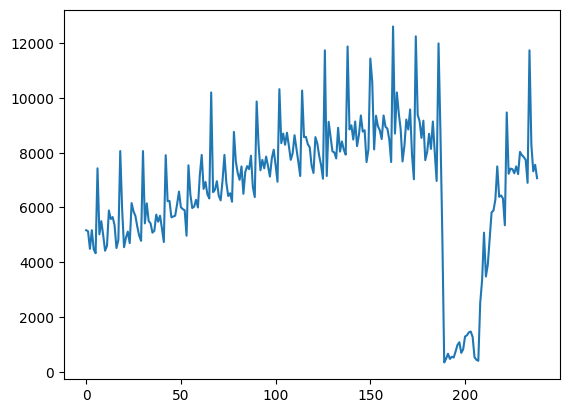

In [163]:
travel_data_ARR["Permanent Family Visas"].plot()

<Axes: >

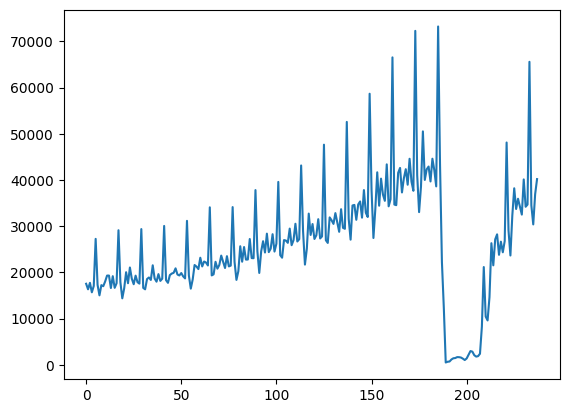

In [164]:
travel_data_DEP["Permanent Visas - Total"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

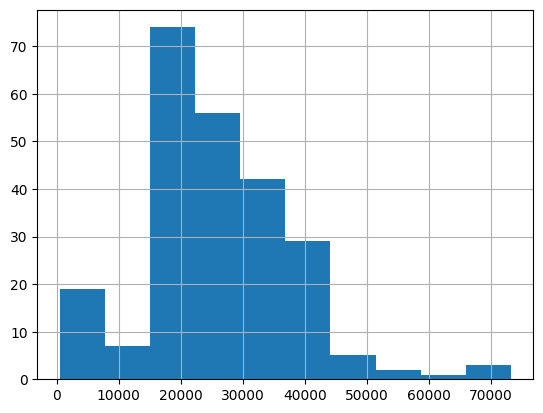

In [167]:
travel_data_DEP["Permanent Visas - Total"].hist()

<Axes: >

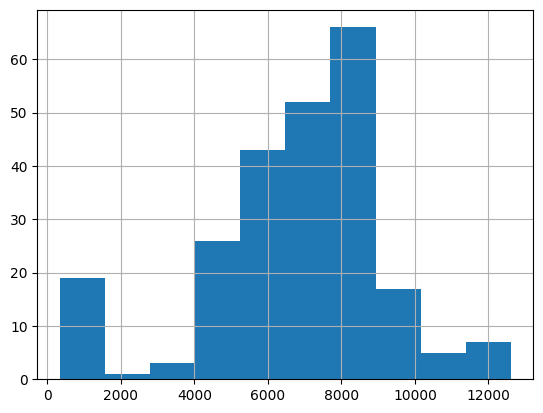

In [169]:
travel_data_ARR['Permanent Family Visas'].hist()



<Axes: >

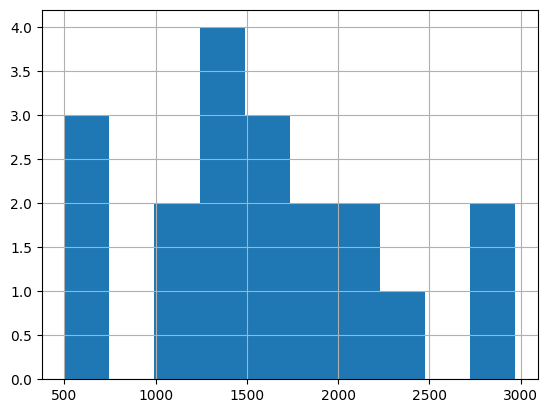

In [170]:
travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000].hist()


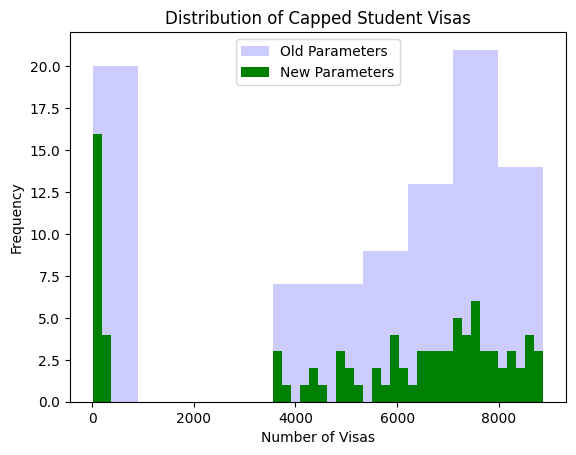

In [193]:
capped_Temp_Student_Visas_data = travel_data_ARR['Temporary Student Visas - Total'][travel_data_ARR['Temporary Student Visas - Total'] < 9000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Student_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Student_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Student Visas')
plt.legend()

# Display the plot
plt.show()

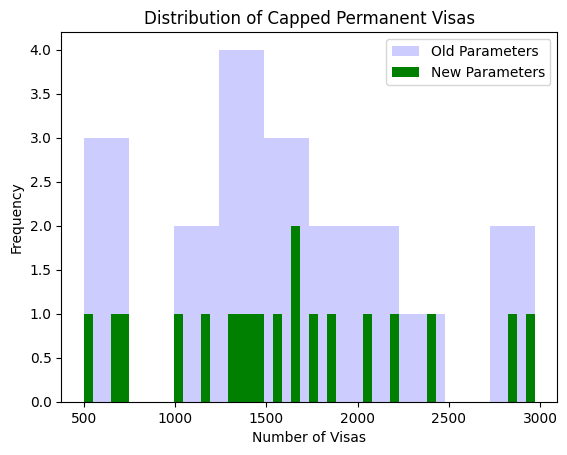

In [183]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

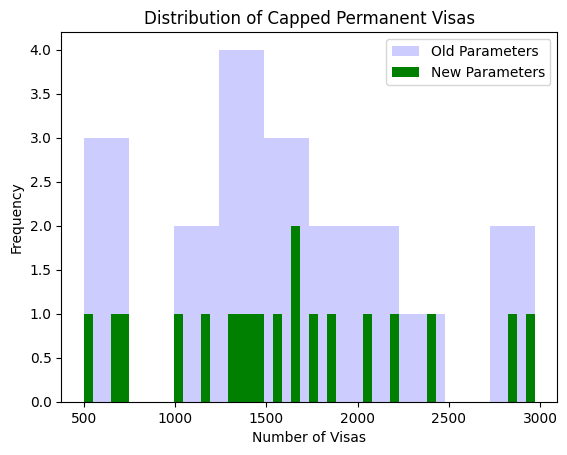

In [174]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

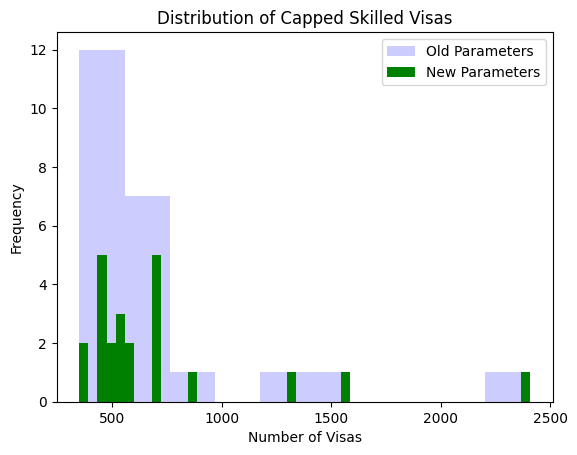

In [175]:
capped_Temp_Skilled_Visas_data = travel_data_DEP["Temporary Skilled Visas"][travel_data_DEP["Temporary Skilled Visas"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Skilled Visas')
plt.legend()

# Display the plot
plt.show()

In [ ]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goltravel_dataish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

# pythons method of stacking items
# .pd turns them into a series
# create a pattern using a serie

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [ ]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about

# 

['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [ ]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goltravel_dataish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

And this one is doing both

Text(0.5, 1.0, 'Visa Ranging 50000')

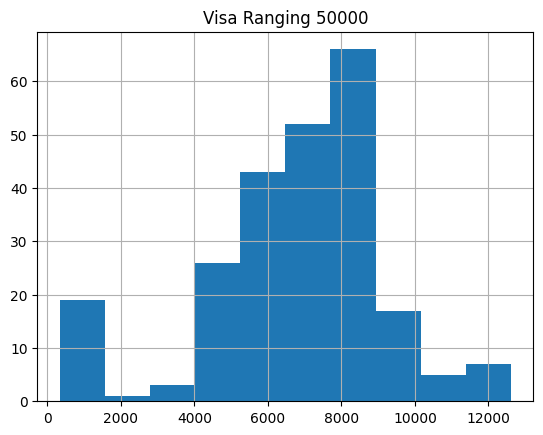

In [ ]:
upper_bound = 50000
travel_data_ARR.P_Fam_Visas[travel_data_ARR.P_Fam_Visas < upper_bound].hist()
plt.title(f"Visa Ranging {upper_bound}")

Let's see what's under $1000

Text(0.5, 1.0, 'All fines under $1000')

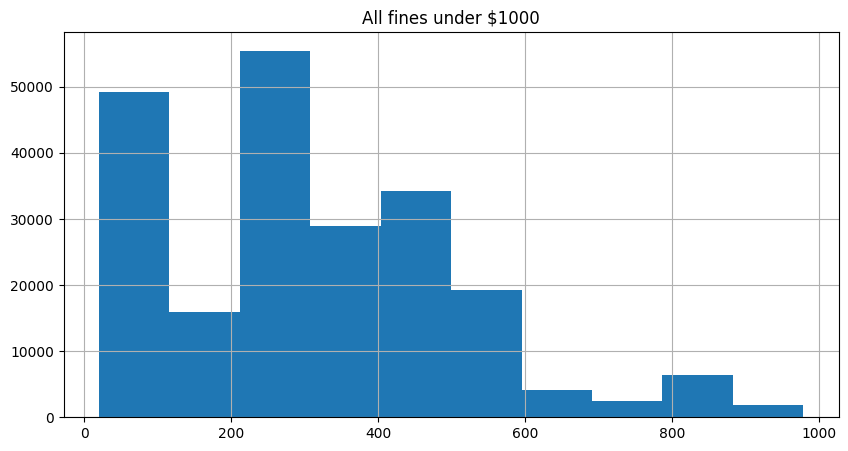

In [ ]:
upper_bound = 1000
penalty_data.P_Fam_Visas[penalty_data.P_Fam_Visas < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


Text(0.5, 1.0, 'Visa Ranging 20')

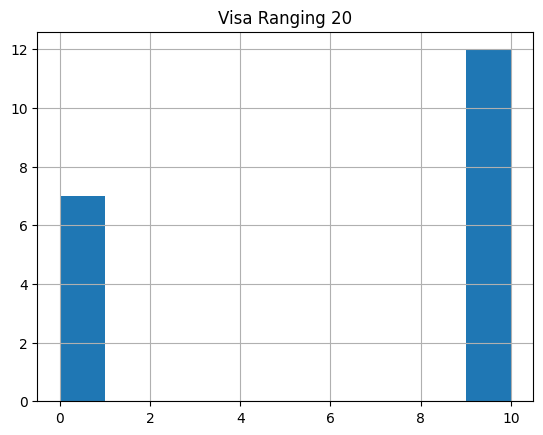

In [ ]:
upper_bound = 20
travel_data_ARR.P_Fam_Visas[travel_data_ARR.P_Fam_Visas < upper_bound].hist()
plt.title(f"Visa Ranging {upper_bound}")

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [ ]:
travel_data_ARR.head(2)


,Month,Special_Category_Visa,P_Fam_Visas,P_Skilled_Visas,P_Other_Visas,P_Visas_TOTAL,T_Student_Visas_HiEd,T_Student_Visas_VET,T_Student_Visas_Schools,T_Student_Visas_INDP_ELICOS(f),T_Student_Visas_PGrad_Research,T_Student_Visas_Other_Students,T_Student_Visas_TOTAL,T_Skilled_Visas,T_Visitor_Visas,T_Work_Visas,T_Other_Visas,T_Visas_TOTAL,Other_Visas(g),TOTAL(h)
0,2004-07-01,360.0,40.0,10.0,190.0,250.0,40.0,30.0,0.0,0.0,10.0,20.0,90.0,100.0,810.0,30.0,100.0,1130.0,10.0,5460.0
1,2004-08-01,280.0,40.0,110.0,270.0,420.0,80.0,0.0,0.0,0.0,10.0,30.0,120.0,50.0,980.0,10.0,30.0,1190.0,10.0,5790.0


We can see that `P_Fam_Visas` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [ ]:
penalty_data.LEGISLATION.value_counts()

# 

LEGISLATION
ROAD RULES 2008                                          103558
ROAD RULES 2014                                           88546
PASSENGER TRANSPORT REGULATION 2007                        4446
ROAD TRANSPORT (VEHICLE REGISTRATION) REGULATION 2007      4185
PROTECTION OF THE ENVIRONMENT OPERATIONS ACT 1997          3070
                                                          ...  
UNLAWFUL GAMBLING ACT 1998                                    1
NON-INDIGENOUS ANIMALS ACT 1987                               1
EXHIBITED ANIMALS PROTECTION ACT 1986                         1
COMMERCIAL AGENTS AND PRIVATE INQUIRY AGENTS ACT 2004         1
HEMP INDUSTRY ACT 2008                                        1
Name: count, Length: 211, dtype: int64

In [ ]:
travel_data_ARR.P_Fam_Visas.value_counts()

P_Fam_Visas
7920.0    3
7660.0    3
7500.0    3
8290.0    3
7740.0    3
         ..
6520.0    1
6210.0    1
7010.0    1
6500.0    1
7070.0    1
Name: count, Length: 193, dtype: int64

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [ ]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


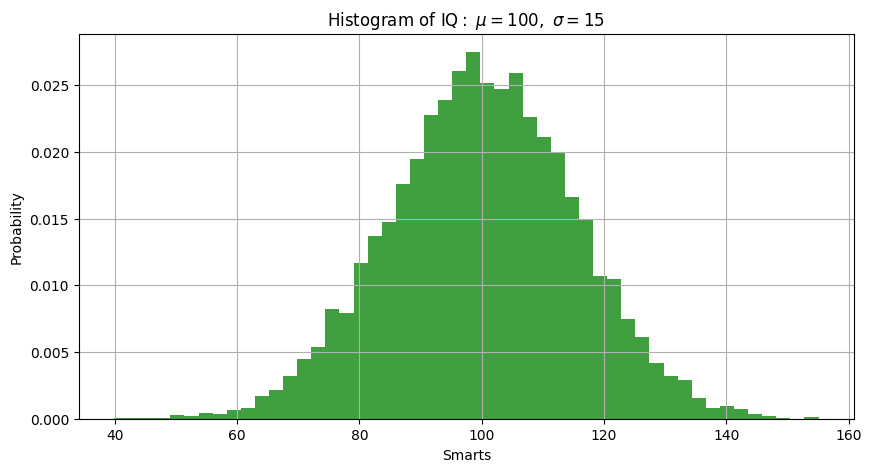

In [ ]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<Axes: >

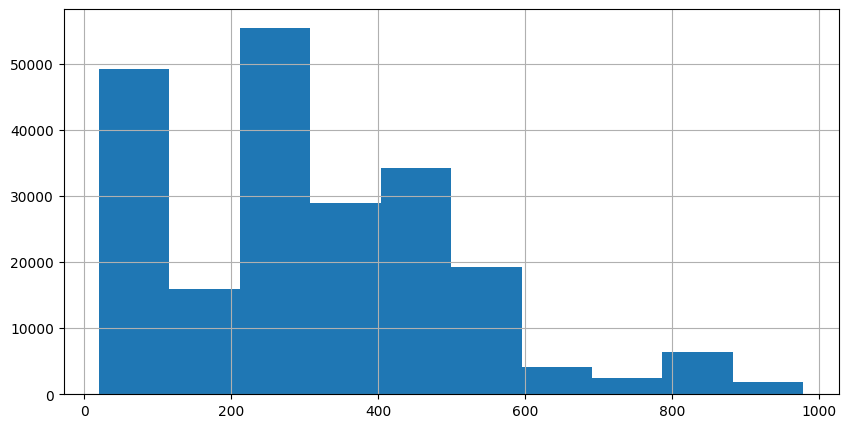

In [ ]:
penalty_data.P_Fam_Visas[penalty_data.LEGISLATION < 1000].hist()


<Axes: >

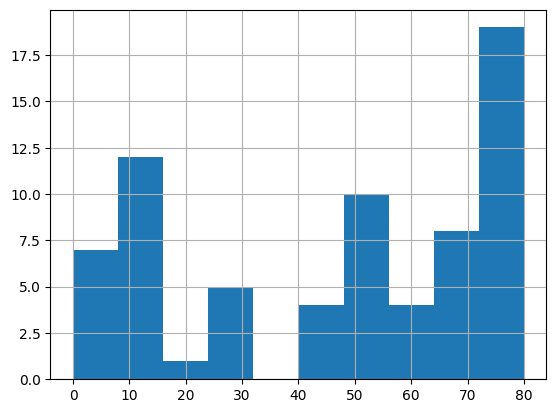

In [ ]:
travel_data.P_Fam_Visas[travel_data.P_Fam_Visas <90].hist()

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

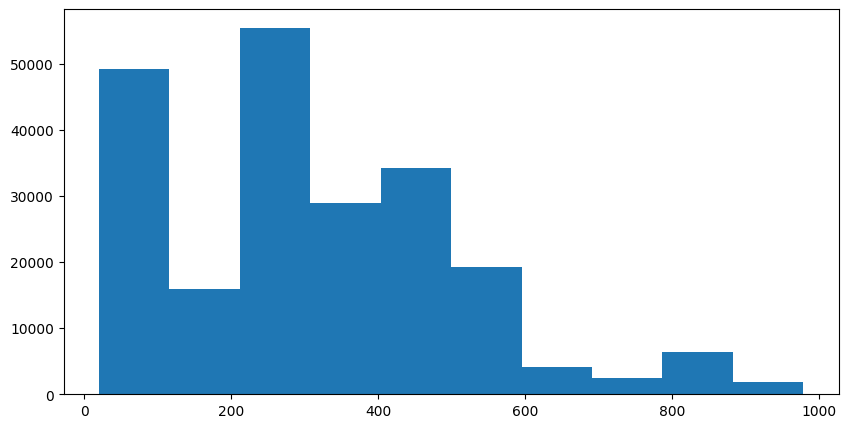

In [ ]:
capped_P_Fam_Visas_data = penalty_data.P_Fam_Visas[penalty_data.P_Fam_Visas < 1000]

plt.hist(capped_P_Fam_Visas_data)
plt.show()


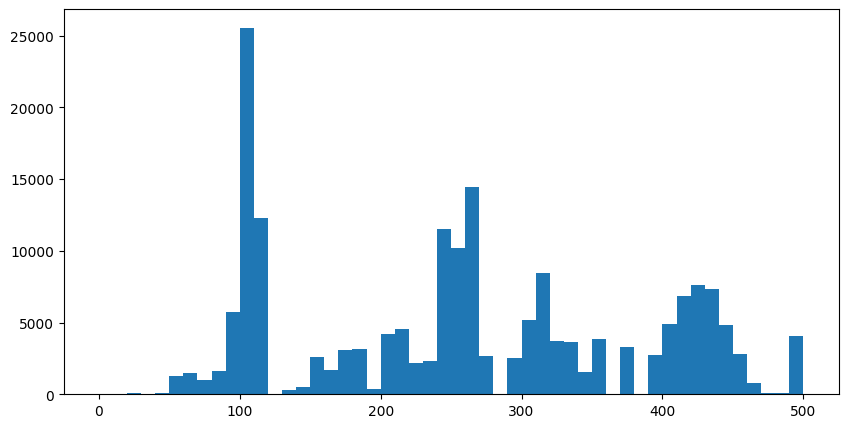

In [ ]:
plt.hist(penalty_data["LEGISLATIONS"], bins=50, range=(0, 500))
plt.show()

# ranging - different from the range function
# 

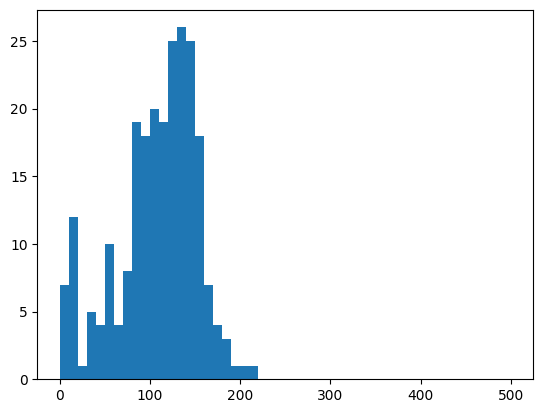

In [ ]:
plt.hist(travel_data["P_Fam_Visas"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

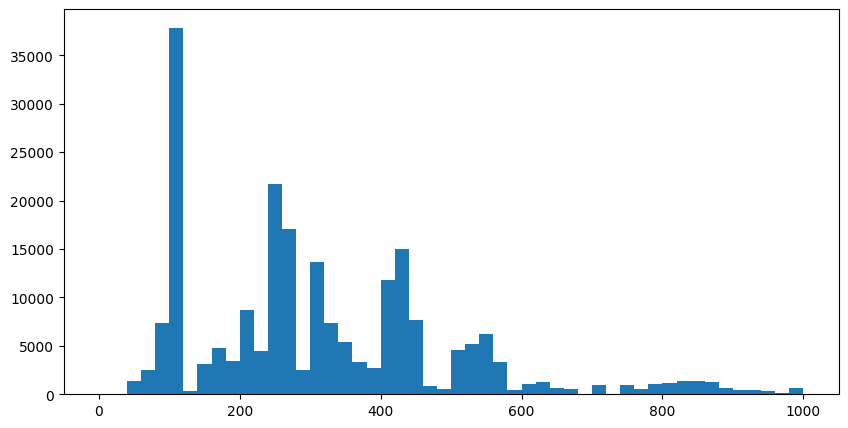

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    penalty_data.P_Fam_Visas,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()

# 

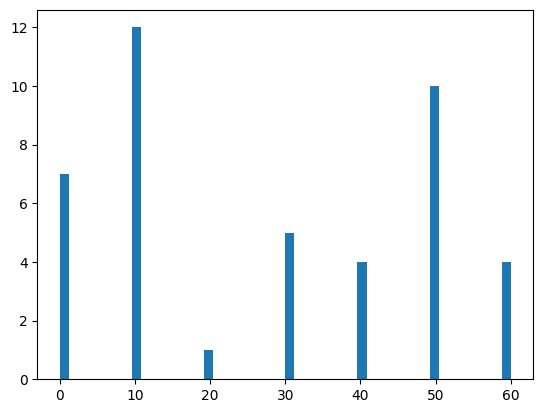

In [ ]:
number_of_bins = 50
lower_bound = 0
upper_bound = 60
plt.hist(
    travel_data.P_Fam_Visas,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

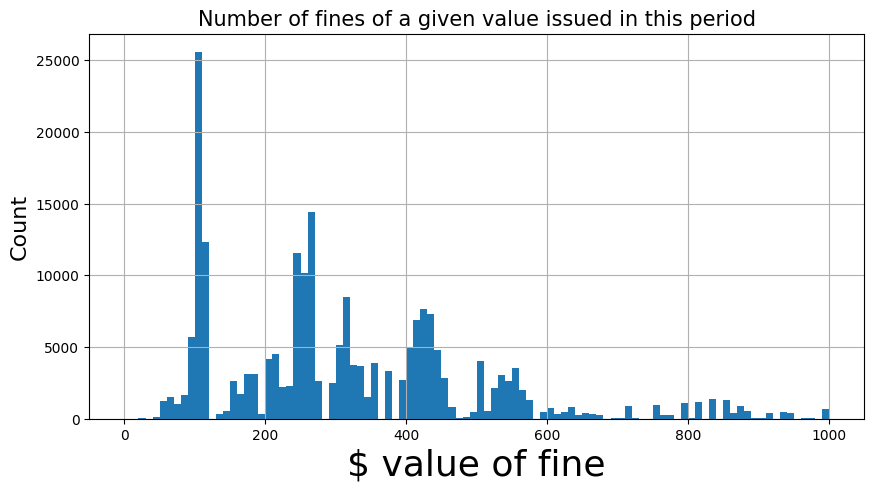

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data.P_Fam_Visas, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued in this period", fontsize=15)
plt.xlabel("$ value of fine", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()

# plt means the plot wants a label, font size and grid. 


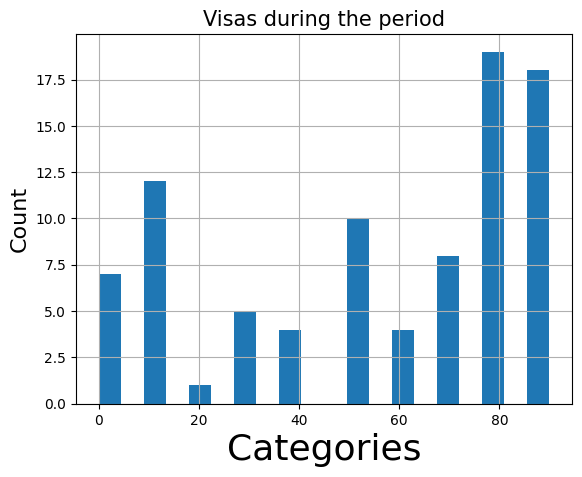

In [ ]:
number_of_bins = 20
lower_bound = 0
upper_bound = 90

plt.hist(travel_data.P_Fam_Visas, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Visas during the period", fontsize=15)
plt.xlabel("Categories", fontsize=26)
plt.ylabel("Count", fontsize=16)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [ ]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)

# if u call a colomun a date it will be a date 
# 

C:\Users\ameli\AppData\Local\Temp\ipykernel_9548\786856591.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  penalty_data = pd.read_csv(


,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


In [ ]:
travel_data = pd.read_excel(
    filepath
        infer_datetime_format=True,
    parse_dates=["MONTH"],
    dayfirst=True,
)
travel_data.head(2)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2198242314.py, line 2)

This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [ ]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"

# strings are not orderable but dates can be ordered


'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [ ]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

# SUper powerful if wanting to display dates
# 

'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

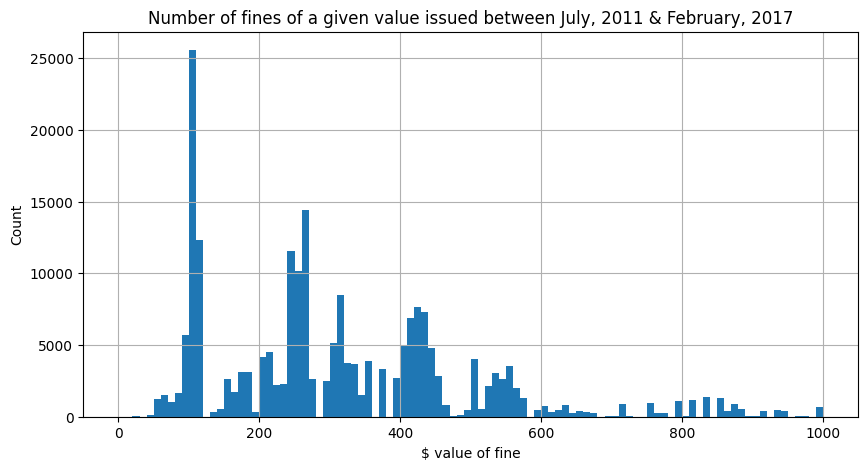

In [ ]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    penalty_data["P_Fam_Visas"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()

# adding more details as you add more information
# 